<p style="background: linear-gradient(to right,#c2e59c,#64b3f4);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 180%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 15px;">
   Table of Contents 
</p>

1. **About the Dataset**
2. **Importing Libraries**
3. **Data Cleaning**
    - Drop Unnecessary columns
    - Handling Missing Values
    - Data Formatting
    
    
4. **Exploratory Data Analysis**
    - Distribution of the Features
    - Correlation Matrix
    

5. **Data Preprocessing**
    - One-hot Encoding
    
    
6. **Machine Learning Model**

7. **Deep Learning Model**

8. **Conclusion**

<p style="background: linear-gradient(to right,#c2e59c,#64b3f4);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 180%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 15px;">
   1. About the Dataset 
</p>

This dataset is composed of survey results for more than 700 people who filled an app form. There are labels portraying whether the person received a diagnosis of autism, allowing machine learning models to predict the likelihood of having autism, therefore allowing healthcare professionals prioritize their resources.

<table><thead><tr><th>Feature</th><th>Description</th></tr></thead><tbody><tr><td>index</td><td>The participant’s ID number</td></tr><tr><td>AX_Score</td><td>Score based on the Autism Spectrum Quotient (AQ) 10 item screening tool <a href="https://docs.autismresearchcentre.com/tests/AQ10.pdf">AQ-10</a></td></tr><tr><td>age</td><td>Age in years</td></tr><tr><td>gender</td><td>Male or Female</td></tr><tr><td>ethnicity</td><td>Ethnicities in text form</td></tr><tr><td>jaundice</td><td>Whether or not the participant was born with jaundice?</td></tr><tr><td>autism</td><td>Whether or not anyone in tbe immediate family has been diagnosed with autism?</td></tr><tr><td>country_of_res</td><td>Countries in text format</td></tr><tr><td>used_app_before</td><td>Whether the participant has used a screening app</td></tr><tr><td>result</td><td>Score from the AQ-10 screening tool</td></tr><tr><td>age_desc</td><td>Age as categorical</td></tr><tr><td>relation</td><td>Relation of person who completed the test</td></tr><tr><td>Class/ASD</td><td>Participant classification</td></tr></tbody></table>

<p style="background: linear-gradient(to right,#c2e59c,#64b3f4);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 180%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 15px;">
   2. Importing Libraries 
</p>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('autism_screening.csv')
df.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score   age gender       ethnicity jundice austim  \
0         1         0          0  26.0      f  White-European      no     no   
1         1         0          1  24.0      m          Latino      no    yes   
2         1         1          1  27.0      m          Latino     yes    yes   
3         1         0          1  35.0      f  White-European      no    yes   
4         1         0          0  40.0      f               ?      no     no   

   contry_of_res used_app_before  result     age_desc relation Class/ASD  
0  United States              no     6.0  18 and more     Self        NO  
1         Brazil              no     5.0  18 and more     Self        NO  
2          Spain              no     8.0  18 and more   Parent       YES  
3  United States              no     6.0  18 and more     Self        NO  
4          Egypt              no     2.0  18 and more        ?        NO

<p style="background: linear-gradient(to right,#c2e59c,#64b3f4);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 180%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 15px;">
   3. Data Cleaning
</p>

In [3]:
df['A10_Score'].unique()

array([0, 1])

So all AX_Score are binary 

<p style="background: linear-gradient(to right,#FFAFBD,#C9FFBF);
          color: transparent;
          font-family: Gabriola;
          color: black;
          font-size: 120%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 10px;">
   3a. Drop unnecessary Columns 
</p>

Since age_desc has only one unique value, it's useless. So drop it

I don't think the column 'used_app_before' and 'relation' matters in diagnosis of ASD. do drop it

In [4]:
df.drop(['age_desc', 'used_app_before', 'relation'], axis=1, inplace=True)

Renaming 'contry_of_res' to 'country'

In [5]:
df.rename(columns = {'contry_of_res': 'country', 'jundice':'jaundice', 'austim':'autism'}, inplace=True)


In [6]:
cat_cols = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
            'A6_Score','A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 
            'gender', 'ethnicity', 'jaundice', 'autism', 'country']

con_cols = ['age', 'result']

target_col = 'Class/ASD,'

<p style="background: linear-gradient(to right,#FFAFBD,#C9FFBF);
          color: transparent;
          font-family: Gabriola;
          color: black;
          font-size: 120%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 10px;">
   3b. Handling Missing Values 
</p>

In [7]:
df.isnull().sum()

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          2
gender       0
ethnicity    0
jaundice     0
autism       0
country      0
result       0
Class/ASD    0
dtype: int64

There doesn't seem to be any missing values except for 2 values in age. But the missing values can also be in other forms

like a question mark in the place of the value

or a value like 0 for features like age or even 200. It's just not possible

In [8]:
# Printing the unique values in every categorical column
for col in cat_cols:
    print(col)
    print(list(df[col].unique()))
    print('-------------')

A1_Score
[1, 0]
-------------
A2_Score
[1, 0]
-------------
A3_Score
[1, 0]
-------------
A4_Score
[1, 0]
-------------
A5_Score
[0, 1]
-------------
A6_Score
[0, 1]
-------------
A7_Score
[1, 0]
-------------
A8_Score
[1, 0]
-------------
A9_Score
[0, 1]
-------------
A10_Score
[0, 1]
-------------
gender
['f', 'm']
-------------
ethnicity
['White-European', 'Latino', '?', 'Others', 'Black', 'Asian', 'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic', 'Turkish', 'others']
-------------
jaundice
['no', 'yes']
-------------
autism
['no', 'yes']
-------------
country
['United States', 'Brazil', 'Spain', 'Egypt', 'New Zealand', 'Bahamas', 'Burundi', 'Austria', 'Argentina', 'Jordan', 'Ireland', 'United Arab Emirates', 'Afghanistan', 'Lebanon', 'United Kingdom', 'South Africa', 'Italy', 'Pakistan', 'Bangladesh', 'Chile', 'France', 'China', 'Australia', 'Canada', 'Saudi Arabia', 'Netherlands', 'Romania', 'Sweden', 'Tonga', 'Oman', 'India', 'Philippines', 'Sri Lanka', 'Sierra Leone', 'E

There are a lot of question marks in these columns:
- ethnicity

Can we afford to drop the rows with missing values?

<p style="background: linear-gradient(to right,#ED9455,white);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 80%;
          text-align: left;
          padding: 5px;">
   Handling missing values in the 'ethnicity' column 
</p>

In [9]:
df.shape

(704, 18)

In [10]:
sum(df['ethnicity'] == '?')

95

Noo. Our dataset only has 700 items, we can't just drop 100 items. We can find which country they are from and assign the race

In [11]:
df[df['ethnicity'] == '?']['country'].value_counts()

Jordan                  42
United Arab Emirates    15
Russia                   5
New Zealand              5
Iran                     5
Afghanistan              3
Kazakhstan               3
Argentina                2
Saudi Arabia             2
Egypt                    1
Brazil                   1
Pakistan                 1
Azerbaijan               1
United States            1
United Kingdom           1
Hong Kong                1
Ukraine                  1
Japan                    1
Bahamas                  1
Lebanon                  1
Austria                  1
Iraq                     1
Name: country, dtype: int64

Most of the missing values belong to jordan and UAE both of which majorly consist of arab people. So let's tream them as arabians

Let's just group some ethnicities together to reduce the number of unique values
- White
- Hispanic (latino included)
- Middle Eastern (arab included)
- Black
- Asian (south asian included)
- Others (consists of turkish as pasifika groups)

In [12]:
# grouping ethnicity and decreasing the number of unique ethnicities
ethnicity = {'White-European': 'White', 
             'Latino': 'Hispanic',
             '?': 'Middle Eastern',
             'Pasifika': 'Others',
             'South Asian': 'Asian',
             'Turkish': 'Others', 
             'others': 'Others'}

def assign_ethnicity(string):
    try:
        ethnicity[string]
    except:
        return string


df['ethnicity'] = df['ethnicity'].apply(assign_ethnicity)

In [13]:
df['ethnicity'].value_counts()

Asian              123
Middle Eastern      92
Black               43
Others              30
Hispanic            13
Name: ethnicity, dtype: int64

<p style="background: linear-gradient(to right,#ED9455,white);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 80%;
          text-align: left;
          padding: 5px;">
   Handling missing values in the 'age' column 
</p>

In [14]:
df['age'].describe()

count    702.000000
mean      29.698006
std       16.507465
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max      383.000000
Name: age, dtype: float64

There can't be someone aged 383 years. So it's a missing value.
Are there other people whose age is more than, say, 100?


In [15]:
sum(df['age'] > 100)

1

Filling Missing values with the mean


In [16]:
df['age'].fillna(30, inplace=True)

In [17]:
df['age'].isnull().sum()

0

In [18]:
df['age'].replace({383.0: 30}, inplace=True)

In [19]:
df['age'].max()

64.0

<p style="background: linear-gradient(to right,#FFAFBD,#C9FFBF);
          color: transparent;
          font-family: Gabriola;
          color: black;
          font-size: 100%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 10px;">
   3c. Grouping the 'country' column based on the continent
</p>

In [20]:
df['country'].nunique()

67

There are 67 countries here. one-hot encoding it would increase the model's complexity by a lot. So we're grouping them based on the continent

In [21]:
def get_continent(input_string):
    continents = {
        'North America': ['United States', 'Canada', 'Bahamas', 'Mexico', 'AmericanSamoa'],
        'South America': ['Brazil', 'Argentina', 'Chile', 'Ecuador', 'Uruguay', 'Bolivia'],
        'Europe': ['Spain', 'Austria', 'Ireland', 'United Kingdom', 'Italy', 'France', 'Netherlands',
                   'Romania', 'Sweden', 'Germany', 'Russia', 'Iceland', 'Belgium', 'Portugal',
                   'Finland', 'Turkey', 'Serbia', 'Czech Republic'],
        'Africa': ['Egypt', 'Burundi', 'South Africa', 'Sierra Leone', 'Ethiopia', 'Niger', 'Angola'],
        'Asia': ['Jordan', 'United Arab Emirates', 'Afghanistan', 'Lebanon', 'Pakistan', 'Bangladesh',
                 'China', 'Saudi Arabia', 'India', 'Philippines', 'Sri Lanka', 'Viet Nam', 'Iran',
                 'Hong Kong', 'Japan', 'Ukraine', 'Kazakhstan', 'Malaysia', 'Cyprus', 'Indonesia',
                 'Azerbaijan', 'Iraq', 'Armenia', 'Nepal'],
        'Oceania': ['New Zealand', 'Australia', 'Tonga']
    }
    
    for continent, countries in continents.items():
        if input_string in countries:
            return continent
    return None
        

df['country'] = df['country'].apply(get_continent)        
        

In [22]:
df['country'].value_counts()

Asia             284
Europe           141
North America    140
Oceania          109
South America     15
Africa            11
Name: country, dtype: int64

In [23]:
df['country'].isnull().sum()

4

In [24]:
df['country'].fillna('Asia', inplace=True)

In [25]:
df['country'].isnull().sum()

0

In [26]:
df.rename(columns={'country':'continent'}, inplace=True)

In [27]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'continent', 'result', 'Class/ASD'],
      dtype='object')

In [28]:
cat_cols.remove('country')
cat_cols.append('continent')

<p style="background: linear-gradient(to right,#FFAFBD,#C9FFBF);
          color: transparent;
          font-family: Gabriola;
          color: black;
          font-size: 120%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 10px;">
   3c. Data Formatting
</p>

In [29]:
df.dtypes

A1_Score       int64
A2_Score       int64
A3_Score       int64
A4_Score       int64
A5_Score       int64
A6_Score       int64
A7_Score       int64
A8_Score       int64
A9_Score       int64
A10_Score      int64
age          float64
gender        object
ethnicity     object
jaundice      object
autism        object
continent     object
result       float64
Class/ASD     object
dtype: object

In [30]:
df['Class/ASD'].replace({'YES':1, 'NO':0}, inplace=True)

In [31]:
df['jaundice'].replace({'yes':1, 'no':0}, inplace=True)
df['autism'].replace({'yes':1, 'no':0}, inplace=True)

In [32]:
df['gender'].replace({'f':1, 'm':0}, inplace=True)

In [33]:
df.dtypes

A1_Score       int64
A2_Score       int64
A3_Score       int64
A4_Score       int64
A5_Score       int64
A6_Score       int64
A7_Score       int64
A8_Score       int64
A9_Score       int64
A10_Score      int64
age          float64
gender         int64
ethnicity     object
jaundice       int64
autism         int64
continent     object
result       float64
Class/ASD      int64
dtype: object

<p style="background: linear-gradient(to right,#c2e59c,#64b3f4);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 180%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 15px;">
   4. Exploratory Data Analysis 
</p>

<p style="background: linear-gradient(to right,#FFAFBD,#C9FFBF);
          color: transparent;
          font-family: Gabriola;
          color: black;
          font-size: 120%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 10px;">
   4a. Distribution of the Features 
</p>

<p style="background: linear-gradient(to right,#c2e59c,white);
          color: transparent;
          font-family: Gabriola;
          color: black;
          font-size: 80%;
          text-align: left;
          border-radius: 10px 70px;
          padding: 5px;
          padding-left: 30px;">
   Categorical Features 
</p>

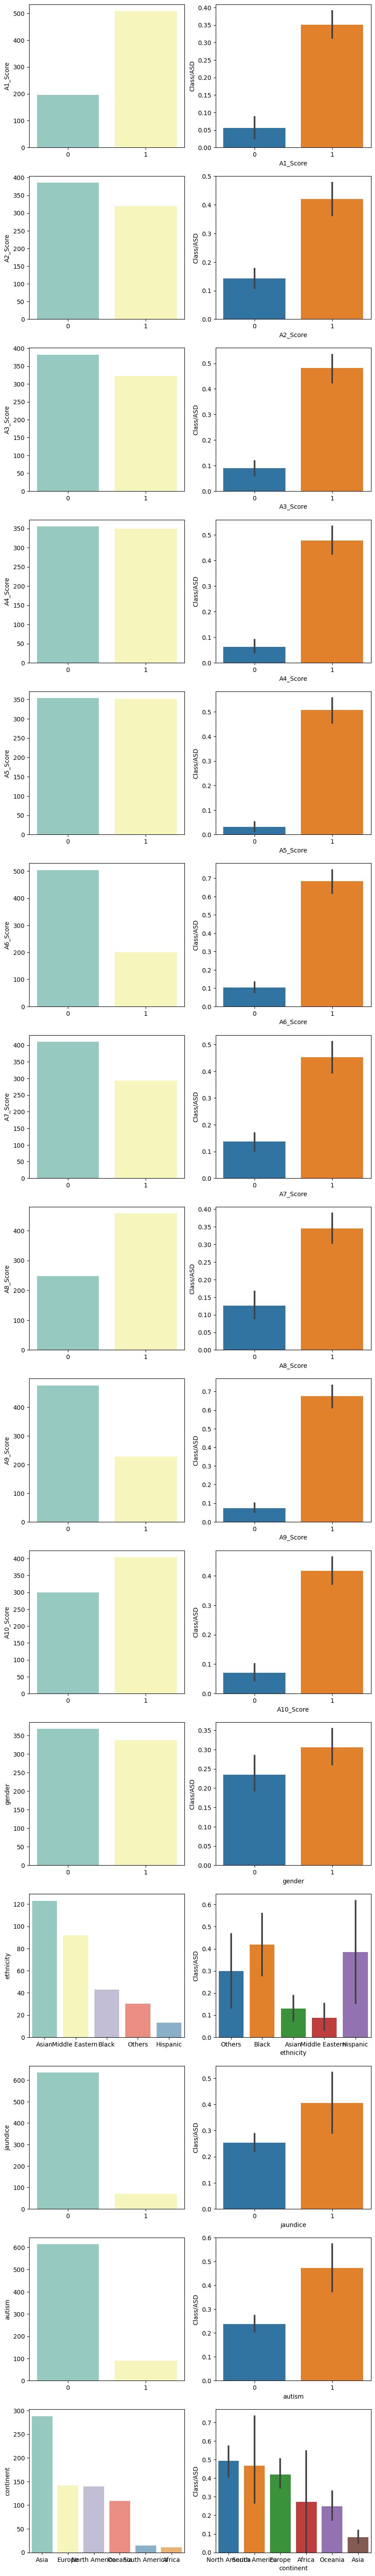

In [34]:
columns = 2
rows = len(cat_cols)

plt.figure(figsize=(columns*5, rows*5))

for i, col in enumerate(cat_cols):
    data = df[col].value_counts()
    plt.subplot(rows, columns, (i*2)+1)
    sns.barplot(x=data.index, y=data, palette='Set3')
    
    plt.subplot(rows, columns, (i*2)+2)
    sns.barplot(x=df[col], y=df['Class/ASD'])
    
    
plt.show()

<p style="background: linear-gradient(to right,#c2e59c,white);
          color: transparent;
          font-family: Gabriola;
          color: black;
          font-size: 80%;
          text-align: left;
          border-radius: 10px 70px;
          padding: 5px;
          padding-left: 30px;">
   Continuous Features 
</p>

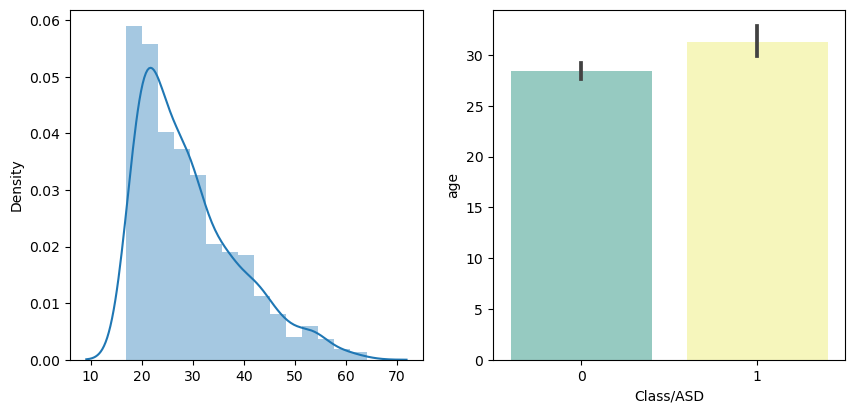

In [35]:
columns = 2
rows = len(con_cols)

plt.figure(figsize=(columns*5, rows*5))

for i, col in enumerate(con_cols):
    plt.subplot(rows, columns, (i*2)+1)
    sns.distplot(x=df[col])
    
    plt.subplot(rows, columns, (i*2)+2)
    sns.barplot(y=df[col], x=df['Class/ASD'], palette='Set3')
    break
    
    
plt.show()

<p style="background: linear-gradient(to right,#c2e59c,white);
          color: transparent;
          font-family: Gabriola;
          color: black;
          font-size: 80%;
          text-align: left;
          border-radius: 10px 70px;
          padding: 5px;
          padding-left: 30px;">
   Observations
</p>

- People who have answered 'yes' for the questions asked tend to have ASD 
- People whose have an immediate family member with ASD have better chance of having ASD themselves. So ASD can be hereditary
- neonatal jaundice may be associated with autism spectrum disorder (ASD) and may increase the risk of ASD. This is interesting
- The ASD rate in asia is much less compared to that of North America and other continents
- Age doesn't seem to be affecting the result

<p style="background: linear-gradient(to right,#FFAFBD,#C9FFBF);
          color: transparent;
          font-family: Gabriola;
          color: black;
          font-size: 120%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 10px;">
   4b. Correlation Matrix
</p>

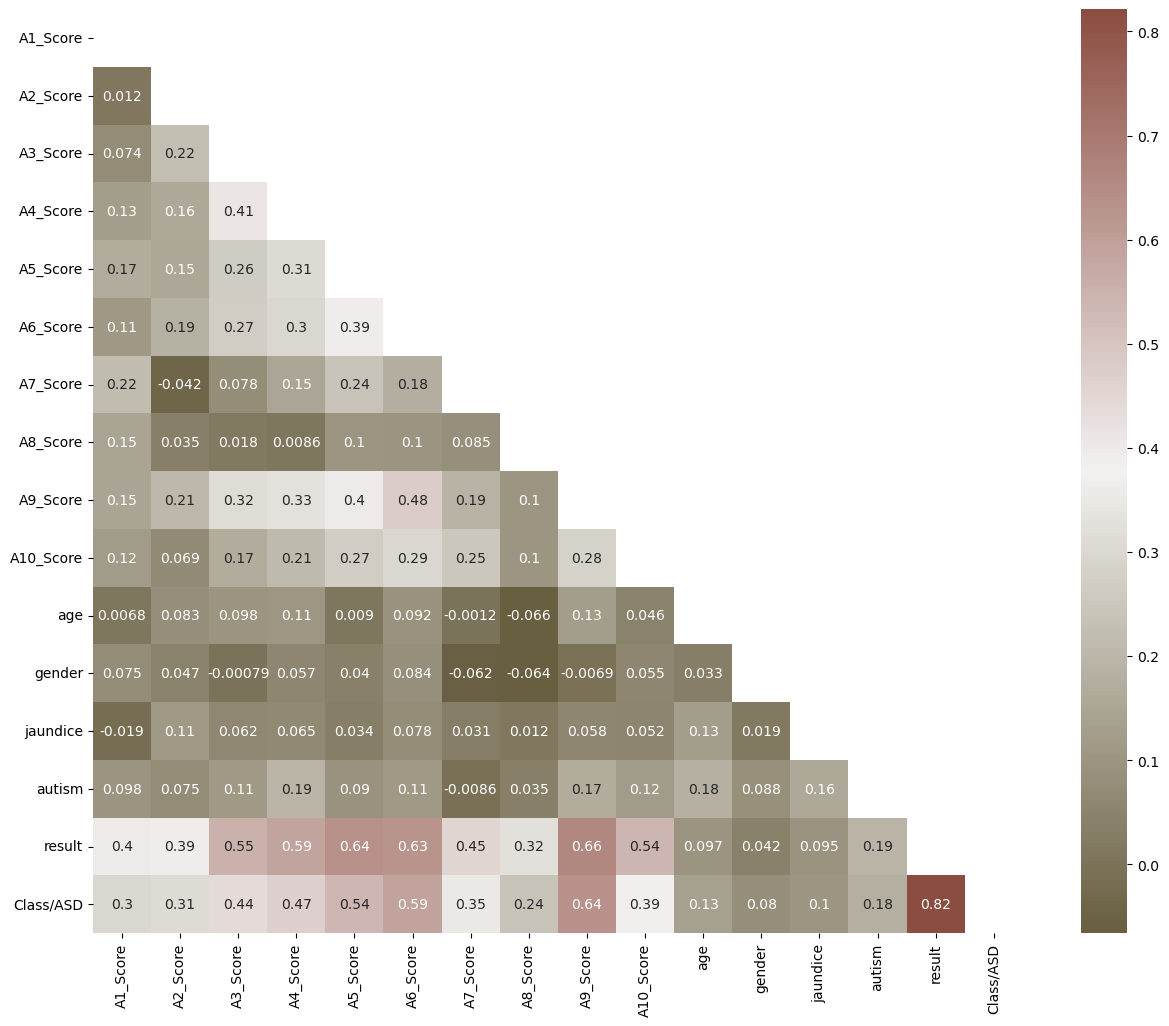

In [36]:
df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr))
corr = df_corr.transpose()
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)

plt.figure(figsize=(15, 12))
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)
plt.show()

There is high correlation between the result and having ASD which is obvious because that result has to play an important role in the diagnosis right

<p style="background: linear-gradient(to right,#c2e59c,#64b3f4);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 180%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 15px;">
   5. Data Preprocessing
</p>

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

<p style="background: linear-gradient(to right,#FFAFBD,#C9FFBF);
          color: transparent;
          font-family: Gabriola;
          color: black;
          font-size: 120%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 10px;">
   5a. One-hot Encoding
</p>

In [38]:
df = pd.get_dummies(df, columns=['continent', 'ethnicity'])

In [39]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [40]:
x = df.drop(['Class/ASD'], axis=1)
y = df['Class/ASD']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=2)


<p style="background: linear-gradient(to right,#c2e59c,#64b3f4);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 180%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 15px;">
   6. Machine Learning Model
</p>

In [41]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [42]:
result = {}

for name, model in models.items():
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    score = accuracy_score(pred, ytest)
    result[name] = score
    
result

{'Logistic Regression': 1.0,
 'Random Forest': 1.0,
 'Support Vector Machine': 0.9716981132075472}

<p style="background: linear-gradient(to right,#c2e59c,#64b3f4);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 180%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 15px;">
   7. Deep Learning Model
</p>

In [43]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

In [44]:
early_stopping = callbacks.EarlyStopping(
                min_delta=0.001, 
                patience = 10,
                restore_best_weights=True
                )

In [45]:
len(x.columns)

26

<p style="background: linear-gradient(to right,#ED9455,white);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 80%;
          text-align: left;
          padding: 5px;
          padding-left: 10px;">
   Initializing the Neural Network
</p>

We are going to start with the Dense units as:
- 30: About the size of the input dimension
- 50: About twice the size of the first layer
- 50: About twice the size of the first layer
- 1 : The size of the input. It's a single number

In [46]:
# Initializing the NN
model = Sequential()

model.add(Dense(units = 30, activation='relu', input_dim=26))

model.add(Dense(units = 50, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(units = 50, activation= 'relu'))

model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

2024-04-21 10:18:04.741682: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<p style="background: linear-gradient(to right,#ED9455,white);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 80%;
          text-align: left;
          padding: 5px;
          padding-left: 10px;">
   Compiling the Model
</p>

In [47]:
model.compile(optimizer='adam', 
             loss = 'binary_crossentropy',
              
             metrics = ['accuracy'])

<p style="background: linear-gradient(to right,#ED9455,white);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 80%;
          text-align: left;
          padding: 5px;
          padding-left: 10px;">
   Fitting the Model
</p>

In [48]:
history = model.fit(xtrain, ytrain,
                   batch_size = 10,
                   callbacks = [early_stopping],
                   epochs = 100, 
                   validation_split = 0.2)

2024-04-21 10:18:04.942071: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
40/40 [==============================] - 1s 9ms/step - loss: 0.9023 - accuracy: 0.6463 - val_loss: 0.4482 - val_accuracy: 0.8081
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5077 - accuracy: 0.7786 - val_loss: 0.3426 - val_accuracy: 0.8687
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7837 - val_loss: 0.2816 - val_accuracy: 0.9091
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8372 - val_loss: 0.2814 - val_accuracy: 0.8990
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8346 - val_loss: 0.2243 - val_accuracy: 0.9192
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3219 - accuracy: 0.8702 - val_loss: 0.2114 - val_accuracy: 0.9192
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3234 - accuracy: 0.8499 - val_loss: 0.2261 - val_accuracy: 0.8990
Epoch 8/100
4

<p style="background: linear-gradient(to right,#ED9455,white);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 80%;
          text-align: left;
          padding: 5px;
          padding-left: 10px;">
   Model Evaluation
</p>

In [50]:
max(history.history['val_accuracy'])

0.9494949579238892

<p style="background: linear-gradient(to right,#ED9455,white);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 80%;
          text-align: left;
          padding: 7px;
          padding-left: 10px;">
   Improving model's accuracy
</p>

This time, We have only one hidden layer

In [51]:
# Initializing the NN
model2 = Sequential()

model2.add(Dense(units = 30, activation='relu', input_dim=26))

model2.add(Dense(units = 50, activation='relu'))

model2.add(Dense(units=1, activation='sigmoid'))


model2.compile(optimizer='adam', 
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history2 = model2.fit(xtrain, ytrain,
                   batch_size = 10,
                   callbacks = [early_stopping],
                   epochs = 100, 
                   validation_split = 0.2)

Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 0.6599 - accuracy: 0.7099 - val_loss: 0.4963 - val_accuracy: 0.7879
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4563 - accuracy: 0.8041 - val_loss: 0.3875 - val_accuracy: 0.8384
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3657 - accuracy: 0.8601 - val_loss: 0.3174 - val_accuracy: 0.8788
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 0.8804 - val_loss: 0.2790 - val_accuracy: 0.9091
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2859 - accuracy: 0.8753 - val_loss: 0.2469 - val_accuracy: 0.9293
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2521 - accuracy: 0.8957 - val_loss: 0.2270 - val_accuracy: 0.9192
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.9059 - val_loss: 0.2149 - val_accuracy: 0.8990
Epoch 8/100
4

In [52]:
max(history2.history['val_accuracy'])

0.9595959782600403

This is definitely better than the last model. Let's change the activation function of the hidden layer from 'relu' to 'linear'

In [61]:
# Initializing the NN
model3 = Sequential()

model3.add(Dense(units = 30, activation='relu', input_dim=26))

model3.add(Dense(units = 50, activation='linear'))

model3.add(Dense(units=1, activation='sigmoid'))


model3.compile(optimizer='adam', 
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history3 = model3.fit(xtrain, ytrain,
                   batch_size = 10,
                   callbacks = [early_stopping],
                   epochs = 100, 
                   validation_split = 0.2)

Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 0.6723 - accuracy: 0.6616 - val_loss: 0.5654 - val_accuracy: 0.7172
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5140 - accuracy: 0.7888 - val_loss: 0.4496 - val_accuracy: 0.7980
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4058 - accuracy: 0.8524 - val_loss: 0.3609 - val_accuracy: 0.8788
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3345 - accuracy: 0.8855 - val_loss: 0.3054 - val_accuracy: 0.8990
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3217 - accuracy: 0.8728 - val_loss: 0.2718 - val_accuracy: 0.9293
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2652 - accuracy: 0.8982 - val_loss: 0.2437 - val_accuracy: 0.9091
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.9084 - val_loss: 0.2270 - val_accuracy: 0.9091
Epoch 8/100
4

Epoch 59/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9796 - val_loss: 0.1290 - val_accuracy: 0.9394
Epoch 60/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9822 - val_loss: 0.1384 - val_accuracy: 0.9495
Epoch 61/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9873 - val_loss: 0.1915 - val_accuracy: 0.9293
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9822 - val_loss: 0.1448 - val_accuracy: 0.9293
Epoch 63/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9720 - val_loss: 0.1277 - val_accuracy: 0.9495
Epoch 64/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9567 - val_loss: 0.1894 - val_accuracy: 0.9394
Epoch 65/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9796 - val_loss: 0.1785 - val_accuracy: 0.9091
Epoch 

In [62]:
max(history3.history['val_accuracy'])


0.9696969985961914

<p style="background: linear-gradient(to right,#c2e59c,#64b3f4);
          color: transparent;
          font-family: Gabriola;
          color: white;
          font-size: 180%;
          text-align: center;
          border-radius: 10px 70px;
          padding: 15px;">
   8. Conclusion 
</p>

- **Random Forest** algorithm gave us an awesome accuracy of **100%**
- Deep learning model with one hidden layer and the dense units as **[30, 50, 1]** and the activation functions as **[relu, linear, sigmoid]** and with **100 epochs** (early stopping applid) gives us an accuracy of **97%**